#    PCA:
(Adapted from Python Machine learning and  bogotogo)
    Here are the steps of PCA algorithm for dimensionality reduction:<br>
    1.Standardize the d-dimensional dataset.<br>
    2.Construct the covariance matrix.<br>
    3.Decompose the covariance matrix into its eigenvectors and eigenvalues.<br>
    4.Select k eigenvectors that correspond to the k largest eigenvalues,
      where ks the dimensionality of the new feature subspace (k≤d)<br>
    5.Construct a projection matrix W from the "top" k eigenvectors.<br>
    6.Transform the d-dimensional input dataset x using the projection matrix W to 
      obtain the new k-dimensional feature subspace.
 

In [1]:
from mlsettings.settings import load_app_config, get_datafolder_path
from mltools.mlcommon import load_data, print_dataset_info, split_dataset, auto_scatter_simple

import os
import matplotlib.pyplot as plt
import numpy as  np
% matplotlib inline 

load_app_config()


Adding D:\DataSource  to system path
Adding D:\MachineLearning  to system path


In [2]:
DIRECTORY = "wine"
FILENAME = "wine.data"
input_path = get_datafolder_path()
 


# PCA Computation
We computed the covariance matrix of the standardized training dataset using the numpy.cov() function.

The symmetric D x D-dimensional covariance matrix, where d is the number of dimensions in the dataset, stores the pairwise covariances between the different features For example, the covariance between two features Xj and Xk on the population level can be calculated via the following equation:
                    <img src="images/covariance.jpg">
Using the linalg.eig function, we performed the eigendecomposition that yielded 13 eigenvalues and the corresponding eigenvectors stored as columns in a 13×13 matrix.

Since we want to reduce the dimensionality of our dataset by compressing it onto a new feature subspace, we only select the subset of the eigenvectors (principal components) that contains most of the information (variance).

Since the eigenvalues define the magnitude of the eigenvectors, we have to sort the eigenvalues by decreasing magnitude, and we are interested in the top k eigenvectors based on the values of their corresponding eigenvalues

Using the projection matrix, we can now transform a sample x (represented as a 1 x 13-dimensional row vector) onto the PCA subspace (the principal components one and two) obtaining Feature transformation, now a two-dimensional sample vector consisting of two new features:
x`=x.W


In [3]:
def start_pca(train_X_std,test_X_std,train_y ,test_y):
   
    covariant_matrix= np.cov(train_X_std.T)
    #print(covariant_matrix[0::5])
    eigen_values,eigen_vectors =np.linalg.eig(covariant_matrix)
    print(eigen_values)
    print(eigen_vectors[::5]) 
    
    #plot variance explained ratios of the eigenvalues
    plot_eigenvalues(eigen_values)
    # Make a list of (eigenvalue, eigenvector) tuples
    eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i]) for i in range(len(eigen_values))]
    # Sort the (eigenvalue, eigenvector) tuples from high to low
    eigen_pairs.sort(key=lambda k: k[0], reverse=True)
    #create a 13×2 projection matrix W from the top two eigenvectors
    w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
    
    train_X_pca = train_X_std.dot(w)
    
    # plot the projections
    colors = ['r', 'b', 'g']
    markers = ['s', 'x', 'o']
    for l, c, m in zip(np.unique(train_y), colors, markers):
        plt.scatter(train_X_pca[train_y==l, 0], train_X_pca[train_y==l, 1], c=c, label=l, marker=m)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend(loc='lower left')
    plt.show()
            

In [4]:
def plot_eigenvalues(eigen_vals):
    tot = sum(eigen_vals)
    var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
    cum_var_exp = np.cumsum(var_exp)
    plt.bar(range(1,14), var_exp, alpha=0.5, align='center',label='individual explained variance')
    plt.step(range(1,14), cum_var_exp, where='mid',label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.legend(loc='best')
    plt.show()
    print(" From the above plot its visible that two features contribute to 60% variance")

In [5]:
from sklearn.decomposition import PCA
def start_pca_scikit(train_X_std,test_X_std,train_y ,test_y):
    pca = PCA(n_components=2, whiten=True).fit(train_X_std)
    train_X_pca = pca.fit_transform(train_X_std)
    test_X_pca = pca.transform(test_X_std)
    colors = ['r', 'b', 'g']
    markers = ['s', 'x', 'o']
    for l, c, m in zip(np.unique(train_y), colors, markers):
        plt.scatter(train_X_pca[train_y==l, 0], train_X_pca[train_y==l, 1], c=c, label=l, marker=m)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend(loc='lower left')
    plt.show()

start_classification
 input file is :D:\DataSource\wine\wine.data loaded.
[4.79500219 2.50003078 1.44306678 0.99901271 0.87517717 0.67821564
 0.53031813 0.35080209 0.28446498 0.11333093 0.14810971 0.18968162
 0.19934466]
[[ 0.12221148  0.49927666 -0.12829383 -0.01136017 -0.35962533  0.23048312
   0.04714035 -0.39450917 -0.37873538  0.10409129 -0.07349869  0.45755259
  -0.09926907]
 [ 0.39099441  0.05595656  0.19268611  0.19038516 -0.14478068 -0.08777222
  -0.09820019  0.39221599 -0.37290376 -0.53850843 -0.37707533 -0.06214601
   0.0581313 ]
 [ 0.31641846 -0.21061646  0.03375899 -0.4398643  -0.15537495  0.09171275
  -0.34939097 -0.47115093 -0.03714341 -0.1539475   0.02172227 -0.44167755
  -0.25230846]]


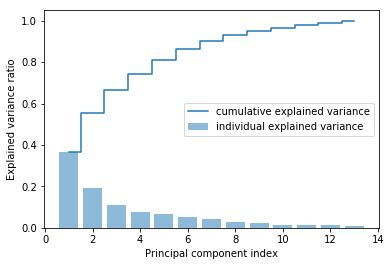

 From the above plot its visible that two features contribute to 60% variance


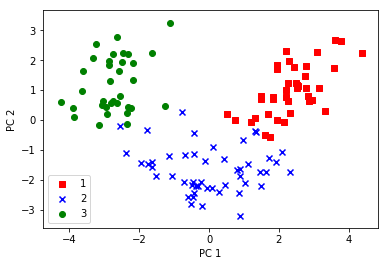

using scikit learn's PCA:


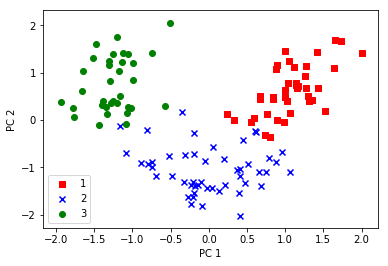

In [6]:
print("start_classification")
input_file = os.path.join(input_path, DIRECTORY, FILENAME)
input_dataset = load_data(input_file)
print(" input file is :{0} loaded.".format(input_file))
     
X,y = input_dataset.iloc[:,1:], input_dataset.iloc[:,0]
from sklearn.model_selection import train_test_split   
(train_X, test_X ,train_y ,test_y)=train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
#print(train_X[0:5].to_string())
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X_std = sc.fit_transform(train_X)
test_X_std= sc.fit_transform(train_X)
    
    
start_pca(train_X_std,test_X_std,train_y ,test_y)
print("using scikit learn's PCA:")
start_pca_scikit(train_X_std,test_X_std,train_y ,test_y)

We can see from the plot, the data is more spread along the x-axis which is the first principal component than the 
y-axis which is the second principal component.
Although we encoded the class labels information for the purpose of illustration in the preceding scatter plot, we have to keep in mind that PCA is an unsupervised technique that doesn't use class label information.